# Pymaceuticals Inc.
---

### Analysis

- There is a strong positive correllation between the volume of a tumor and the mouse's weight.

- Capomulin and Rumicane seem to be the most effective, with similar distributions of final tumor size.

- Infubinol had the highest range of final tumor volume. 

- All other treatments had a similar (smaller) range.
 

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")

# Display the data table for preview
mouse_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [9]:
# Checking the number of mice.
number_of_mice = mouse_data_complete['Mouse ID'].nunique()
number_of_mice

249

In [14]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_data_complete[mouse_data_complete.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [17]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_dupe = mouse_data_complete[mouse_data_complete['Mouse ID']=="g989"]
mouse_dupe

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_dupe_drop = mouse_data_complete[mouse_data_complete['Mouse ID']=="g989"].index
mouse_data_clean = mouse_data_complete.drop(mouse_dupe_drop)
mouse_data_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [19]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_cleaned = mouse_data_clean['Mouse ID'].nunique()
number_of_mice_cleaned

248

## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tv_mean = mouse_data_clean.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
tv_median = mouse_data_clean.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
tv_variance = mouse_data_clean.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
tv_stdev = mouse_data_clean.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
tv_SEM = mouse_data_clean.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary DataFrame.
tumor_summary = pd.DataFrame({
    'Mean Tumor Volume' : tv_mean,
    'Median Tumor Volume' : tv_median,
    'Tumor Volume Variance' : tv_variance,
    'Tumor Vol. Std. Dev.' : tv_stdev,
    'Tumor Vol. Std. Error' : tv_SEM
})

tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Vol. Std. Dev.,Tumor Vol. Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

tumor_summary2 = mouse_data_clean.groupby(['Drug Regimen']).agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
tumor_summary2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

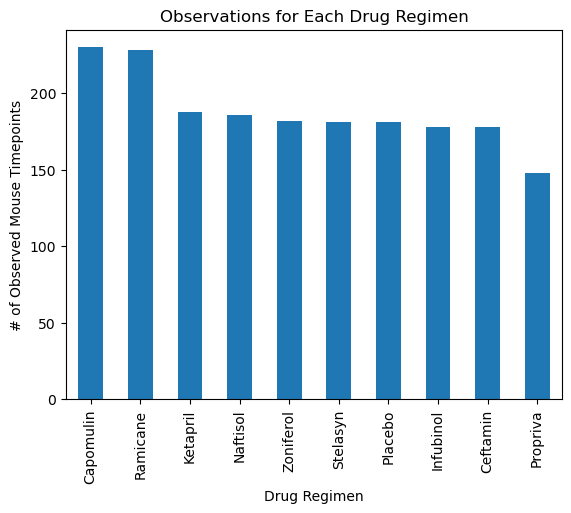

In [42]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_bar_counts = mouse_data_clean['Drug Regimen'].value_counts()
bar2 = mouse_bar_counts.plot(kind = 'bar')
bar2.set_xlabel("Drug Regimen")
bar2.set_ylabel("# of Observed Mouse Timepoints")
bar2.set_title("Observations for Each Drug Regimen")
plt.show()

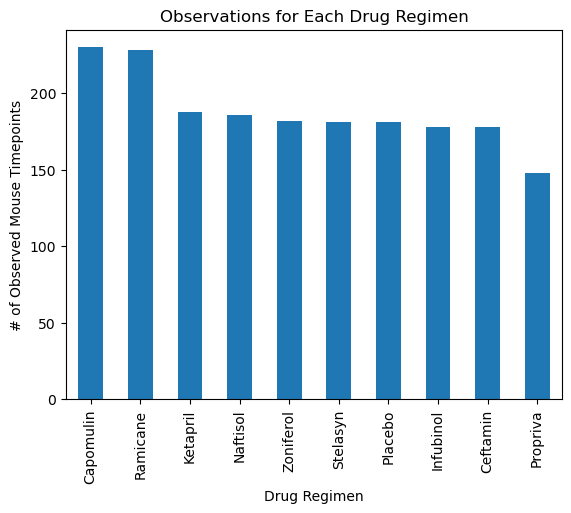

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_bar_counts = mouse_data_clean['Drug Regimen'].value_counts()
bar1 = mouse_bar_counts.plot.bar()
bar1.set_xlabel("Drug Regimen")
bar1.set_ylabel("# of Observed Mouse Timepoints")
bar1.set_title("Observations for Each Drug Regimen")
plt.show()

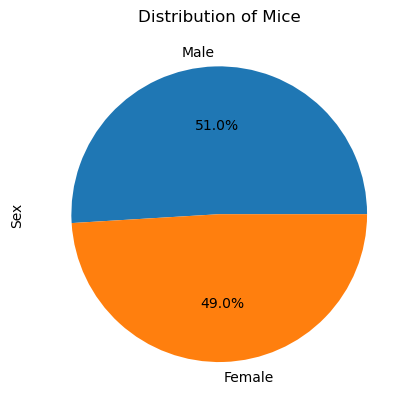

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = mouse_data_clean['Sex'].value_counts()
pie1 = counts.plot(kind = 'pie', autopct='%1.1f%%')
pie1.set_title("Distribution of Mice")

plt.show()

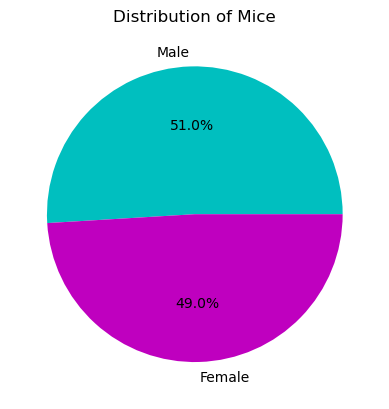

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = mouse_data_clean['Sex'].value_counts()
plt.pie(counts, labels = ['Male', 'Female'], autopct = '%1.1f%%', startangle = 0, colors = ['c', 'm'])
plt.title('Distribution of Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = mouse_data_clean.groupby('Mouse ID')['Timepoint'].max()
greatest_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_data_max_time = pd.merge(mouse_data_complete, greatest_timepoint, how="outer", on="Mouse ID")
mouse_data_max_time

,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,45.0
1,b128,5,45.651331,0,Capomulin,Female,9,22,45.0
2,b128,10,43.270852,0,Capomulin,Female,9,22,45.0
3,b128,15,43.784893,0,Capomulin,Female,9,22,45.0
4,b128,20,42.731552,0,Capomulin,Female,9,22,45.0
...,...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17,45.0
1889,m601,30,31.758275,1,Capomulin,Male,22,17,45.0
1890,m601,35,30.834357,1,Capomulin,Male,22,17,45.0
1891,m601,40,31.378045,1,Capomulin,Male,22,17,45.0


In [61]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatment = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']
tumor_vol = []

for drug in treatment:
    end_tumor_vol = mouse_data_max_time.loc[mouse_data_max_time['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_vol.append(end_tumor_vol)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Capomulin Calculations:
capomulin = tumor_vol[0]
cap_quartiles = capomulin.quantile([0.25, 0.5, 0.75])
cap_q1 = cap_quartiles[0.25]
cap_med = cap_quartiles[0.5]
cap_q3 = cap_quartiles[0.75]
cap_IQR = cap_q3 - cap_q1
cap_lowerbound = cap_med - 1.5*cap_IQR
cap_upperbound = cap_med + 1.5*cap_IQR
print(f'For Capomulin: values outside of the range {cap_lowerbound} to {cap_upperbound} are potential outliers.')


# Ceftamin Calculations:
ceftamin = tumor_vol[1]
cef_quartiles = ceftamin.quantile([0.25, 0.5, 0.75])
cef_q1 = cef_quartiles[0.25]
cef_med = cef_quartiles[0.5]
cef_q3 = cef_quartiles[0.75]
cef_IQR = cef_q3 - cef_q1
cef_lowerbound = cef_med - 1.5*cef_IQR
cef_upperbound = cef_med + 1.5*cef_IQR
print(f'For Ceftamin: values outside of the range {cef_lowerbound} to {cef_upperbound} are potential outliers.')

# Infubinol Calculations:
infubinol = tumor_vol[2]
inf_quartiles = infubinol.quantile([0.25, 0.5, 0.75])
inf_q1 = inf_quartiles[0.25]
inf_med = inf_quartiles[0.5]
inf_q3 = inf_quartiles[0.75]
inf_IQR = inf_q3 - inf_q1
inf_lowerbound = inf_med - 1.5*inf_IQR
inf_upperbound = inf_med + 1.5*inf_IQR
print(f'For Infubinol: values outside of the range {inf_lowerbound} to {inf_upperbound} are potential outliers.')


# Ramicane Calculations:
ramicane = tumor_vol[3]
ram_quartiles = ramicane.quantile([0.25, 0.5, 0.75])
ram_q1 = ram_quartiles[0.25]
ram_med = ram_quartiles[0.5]
ram_q3 = ram_quartiles[0.75]
ram_IQR = ram_q3 - ram_q1
ram_lowerbound = ram_med - 1.5*ram_IQR
ram_upperbound = ram_med + 1.5*ram_IQR
print(f'For Ramicane: values outside of the range {ram_lowerbound} to {ram_upperbound} are potential outliers.')


For Capomulin: values outside of the range 30.586708177499993 to 52.5289095825 are potential outliers.
For Ceftamin: values outside of the range 37.386641593749985 to 66.16567296625001 are potential outliers.
For Infubinol: values outside of the range 36.81744837874999 to 66.82372038125001 are potential outliers.
For Ramicane: values outside of the range 28.1851874175 to 53.1612836625 are potential outliers.


<function matplotlib.pyplot.show(close=None, block=None)>

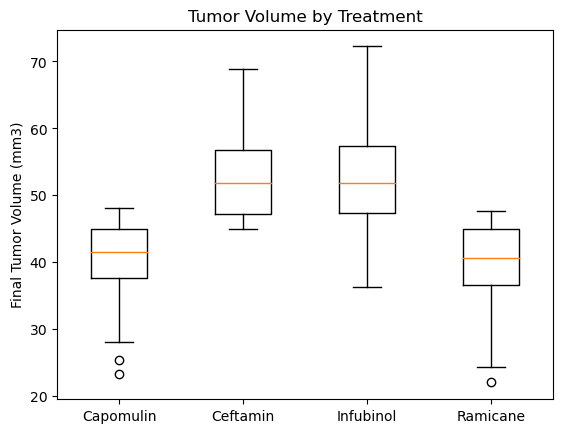

In [62]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = [capomulin, ceftamin, infubinol, ramicane]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Treatment')
ax1.set_ylabel('Final Tumor Volume (mm3)')

ax1.boxplot(treatments, labels = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"])
plt.show

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

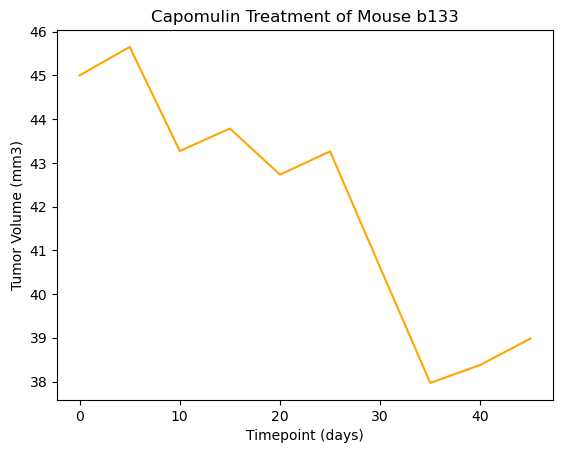

In [65]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_mouse = mouse_data_clean.loc[(mouse_data_clean['Mouse ID'] == 'b128')]
cap_mouse = cap_mouse.set_index('Timepoint')
cap_mouse['Tumor Volume (mm3)'].plot(color = 'orange')
plt.title('Capomulin Treatment of Mouse b133')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show

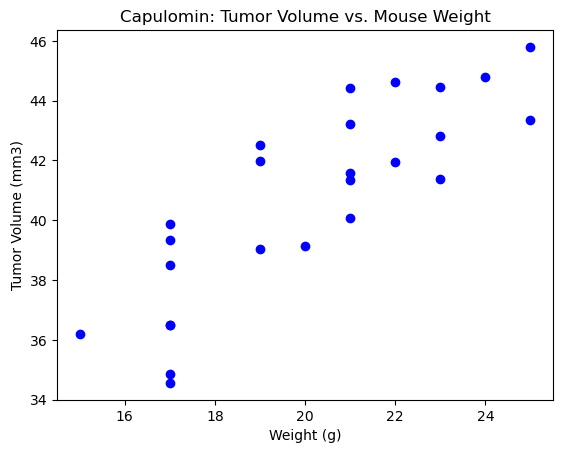

In [67]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_scatter = mouse_data_clean.loc[(mouse_data_clean['Drug Regimen'] == 'Capomulin')]
cap_scatter = cap_scatter.groupby(["Mouse ID"]).mean()
weight_mean = cap_scatter["Weight (g)"]
tumor_mean = cap_scatter["Tumor Volume (mm3)"]
plt.scatter(weight_mean, tumor_mean, color = "blue")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capulomin: Tumor Volume vs. Mouse Weight")
plt.show()

## Correlation and Regression

In [69]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"The correlation coefficient between average tumor volume and mouse weight is {round(st.pearsonr(tumor_mean,weight_mean)[0],2)}")

The correlation coefficient between average tumor volume and mouse weight is 0.84


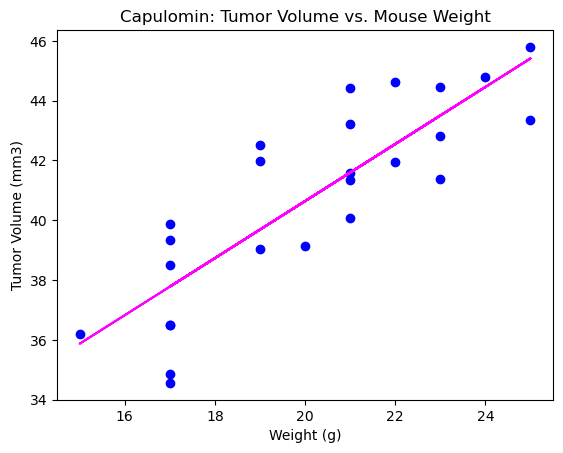

In [75]:
linear_reg = st.linregress(cap_scatter['Tumor Volume (mm3)'], cap_scatter['Weight (g)'])
linear_reg

slope, intercept, rvalue, pvalue, stderr = st.linregress(weight_mean, tumor_mean)
line = slope*weight_mean + intercept
plt.plot(weight_mean, line, color = 'magenta')
plt.scatter(weight_mean, tumor_mean, color = "blue")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capulomin: Tumor Volume vs. Mouse Weight")
plt.show()
